# Introduction

In this homework we work on three different tasks: housing price in Ekhagen, Swedish election of 2018, and predicting strokes.

## Apartment prices

In this part we analyse the apartment prices in Ekhagen. We:
  - open the .csv file and load it into a pandas data frame 
  - find the price per square meter (ppsqm)
  - find the 5 most expensive properties by square meter by sorting the dataframe by ppsqm and display it in a table
  - find the average ppsqm and print it.
    
An interesting feature of the data is that the top 3 most expensive apartments are all located on the same street: Ekhagsvägen. We notice that the ppsqm for these three apartments is similar.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt # used in part 3
import seaborn as sns # used in part 3

In [34]:
df = pd.read_csv('Booli_sold.csv')

In [35]:
df['ppsqm'] = df['soldPrice'] / df['livingArea']
df_sorted = df.sort_values(by='ppsqm', ascending=False)
print("Table with top 5 most expensive appartments w.r.t ppsqm")
print(df_sorted[['ppsqm', 'soldPrice', 'livingArea', 'location.address.streetAddress']].head(5))

Table with top 5 most expensive appartments w.r.t ppsqm
            ppsqm  soldPrice  livingArea location.address.streetAddress
67  104166.666667    2500000        24.0                  Ekhagsvägen 8
50  102083.333333    2450000        24.0                  Ekhagsvägen 8
54  100000.000000    2300000        23.0                 Ekhagsvägen 10
34   88400.000000    2210000        25.0                Torphagsvägen 4
55   85501.858736    2300000        26.9                Docentbacken 1B


In [36]:
average_ppsqm = df['ppsqm'].mean()
print(f"The average price per square meter (ppsqm) is: {average_ppsqm:.2f}")

The average price per square meter (ppsqm) is: 58759.38


## The Swedish Election of 2018

In this part we analyse the result of the Swedish election of 2018. We:
  - open the .csv file (with ; as separator and , as decimal sign) and load it into a pandas data frame
  - calculate the total number of legitimate votes in Stockholms län
  - find the municipality where the social democratic party garnered the hightest voting percentage
  - Rank the 3 municipalities with highest participation and display it as a table

In [37]:
df2 = pd.read_csv('2018_R_per_kommun.csv', sep=';', decimal=',')

In [38]:
filtered_df2 = df2[df2['LÄNSNAMN'] == 'Stockholms län']
total_votes = filtered_df2['RÖSTER GILTIGA'].sum()
print(f"The total number of valid votes in Stockholms län is: {total_votes}")


The total number of valid votes in Stockholms län is: 1426237


In [39]:
df2_sorted_S = df2.sort_values(by='S', ascending=False)
print("The municipality which  garnered the hightest voting percentage is:")
print(df2_sorted_S[['KOMMUNNAMN', 'S']].head(1))

The municipality which  garnered the hightest voting percentage is:
    KOMMUNNAMN      S
188   Munkfors  52.18


In [40]:
df2_sorted_VALDELTAGANDE = df2.sort_values(by='VALDELTAGANDE', ascending=False)
print("Table of the top 3 municipalities with highest voting percentage")
print(df2_sorted_VALDELTAGANDE[['KOMMUNNAMN', 'VALDELTAGANDE']].head(3))

Table of the top 3 municipalities with highest voting percentage
    KOMMUNNAMN  VALDELTAGANDE
103      Lomma          93.86
59        Habo          93.35
98    Vellinge          93.13


## Predicting Strokes

In this part we analyse data about stroke cases and information about the individuals it pertains. We:
  - open the data file and load the data into a pandas dataframe
  - with libraries matplotlib and seaborn, draw a bar plot showing the stroke occurences based on the smoking status.
  
When analysing the plot we see that for people who smoked and formerly smoked, the occurence of no stroke is approximately the same. However
the occurence of stroke is higher in the group who formerly smoked.

In [41]:
df = pd.read_csv('stroke-data.csv')

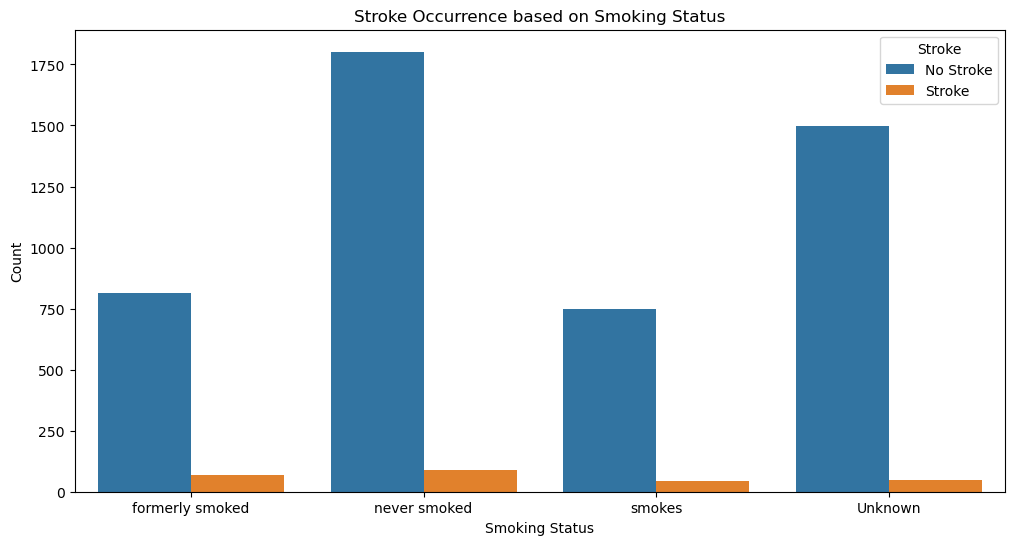

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke')

plt.title('Stroke Occurrence based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

plt.show()